<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/18_Series_Tiempo_Cap16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 3. Predicciones a gran escala con aprendizaje profundo**

## **Introducción**
+ Los modelos estadísticos tienen sus limitaciones, especialmente cuando un conjunto de datos es grande y tiene muchas características y relaciones no lineales.
+ En tales casos, el aprendizaje profundo es la herramienta perfecta para la previsión de series temporales.
+ En esta parte del libro, trabajaremos con un conjunto de datos masivo y aplicaremos diferentes arquitecturas de aprendizaje profundo, como **la memoria a corto plazo larga (LSTM), una red neuronal convolucional (CNN) y una red neuronal profunda autorregresiva, para predecir el futuro de nuestra serie**.
+ Nuevamente, concluiremos esta parte con un proyecto final para poner a prueba sus habilidades.
+ El aprendizaje profundo es un subconjunto del aprendizaje automático y, por lo tanto, es posible utilizar algoritmos de aprendizaje automático más tradicionales para la previsión de series temporales, como **árboles potenciados por gradiente**.
+ Para mantener esta sección razonable, no cubriremos esas técnicas específicamente, aunque se requiere la creación de ventanas de datos para pronosticar series temporales con aprendizaje automático, y aplicaremos este concepto numerosas veces.


# **16. Filtrado de una serie temporal con CNN**

## **Esta parte de Este capítulo cubre**
+ EAnálisis de la arquitectura de CNN
+ Implementación de una CNN con Keras
+ Combinación de una CNN con un LSTM

## **La red neuronal convolucional (CNN)**
+ En el último capítulo, examinamos e implementamos una red de memoria a corto plazo larga (LSTM), que es un tipo de red neuronal recurrente (RNN) que procesa secuencias de datos especialmente bien.
+ Su implementación fue la arquitectura de mayor rendimiento para el modelo de un solo paso, el modelo de varios pasos y el modelo de múltiples salidas.
+ Ahora vamos a explorar la red neuronal convolucional (CNN).
+ Las CNN se aplican principalmente en el campo de la visión por computadora, y esta arquitectura está detrás de muchos algoritmos para la clasificación y segmentación de imágenes.
+ Por supuesto, esta arquitectura también se puede utilizar para el análisis de series de tiempo.
+ Resulta que las CNN son resistentes al ruido y pueden filtrar eficazmente el ruido en una serie de tiempo con la operación de convolución.
+ Esto permite que la red produzca un conjunto de características robustas que no incluyen valores anormales.
+ *Además, las CNN suelen ser más rápidas de entrenar que las LSTM, ya que sus operaciones se pueden paralelizar.*
+ En este capítulo, primero exploraremos la arquitectura de CNN y comprenderemos cómo la red filtra una serie de tiempo y crea un conjunto único de características.
+ Luego implementaremos una CNN usando Keras para generar pronósticos.
+ También combinaremos la arquitectura CNN con la arquitectura LSTM para ver si podemos mejorar aún más el rendimiento de nuestros modelos de aprendizaje profundo.

# **16.1 Análisis de la red neuronal convolucional (CNN)**
+ *Una red neuronal convolucional es una arquitectura de aprendizaje profundo que utiliza la operación de convolución*.
+ La operación de convolución permite que la red cree un conjunto reducido de características.
+ Por lo tanto, es una forma de regularizar la red, evitar el sobreajuste y filtrar eficazmente las entradas.
+ Por supuesto, para que esto tenga sentido, primero debe comprender la operación de convolución y cómo afecta las entradas.
+ En términos matemáticos, *una convolución es una operación sobre dos funciones que genera una tercera función que expresa cómo la forma de una función cambia por la otra*.
+ En una CNN, esta operación ocurre entre las entradas y un núcleo (también conocido como filtro).
+ El núcleo es simplemente una matriz que se coloca sobre la matriz de características.
+ En la figura 16.1, el núcleo se desliza a lo largo del eje del tiempo, tomando el producto escalar entre el núcleo y las características.

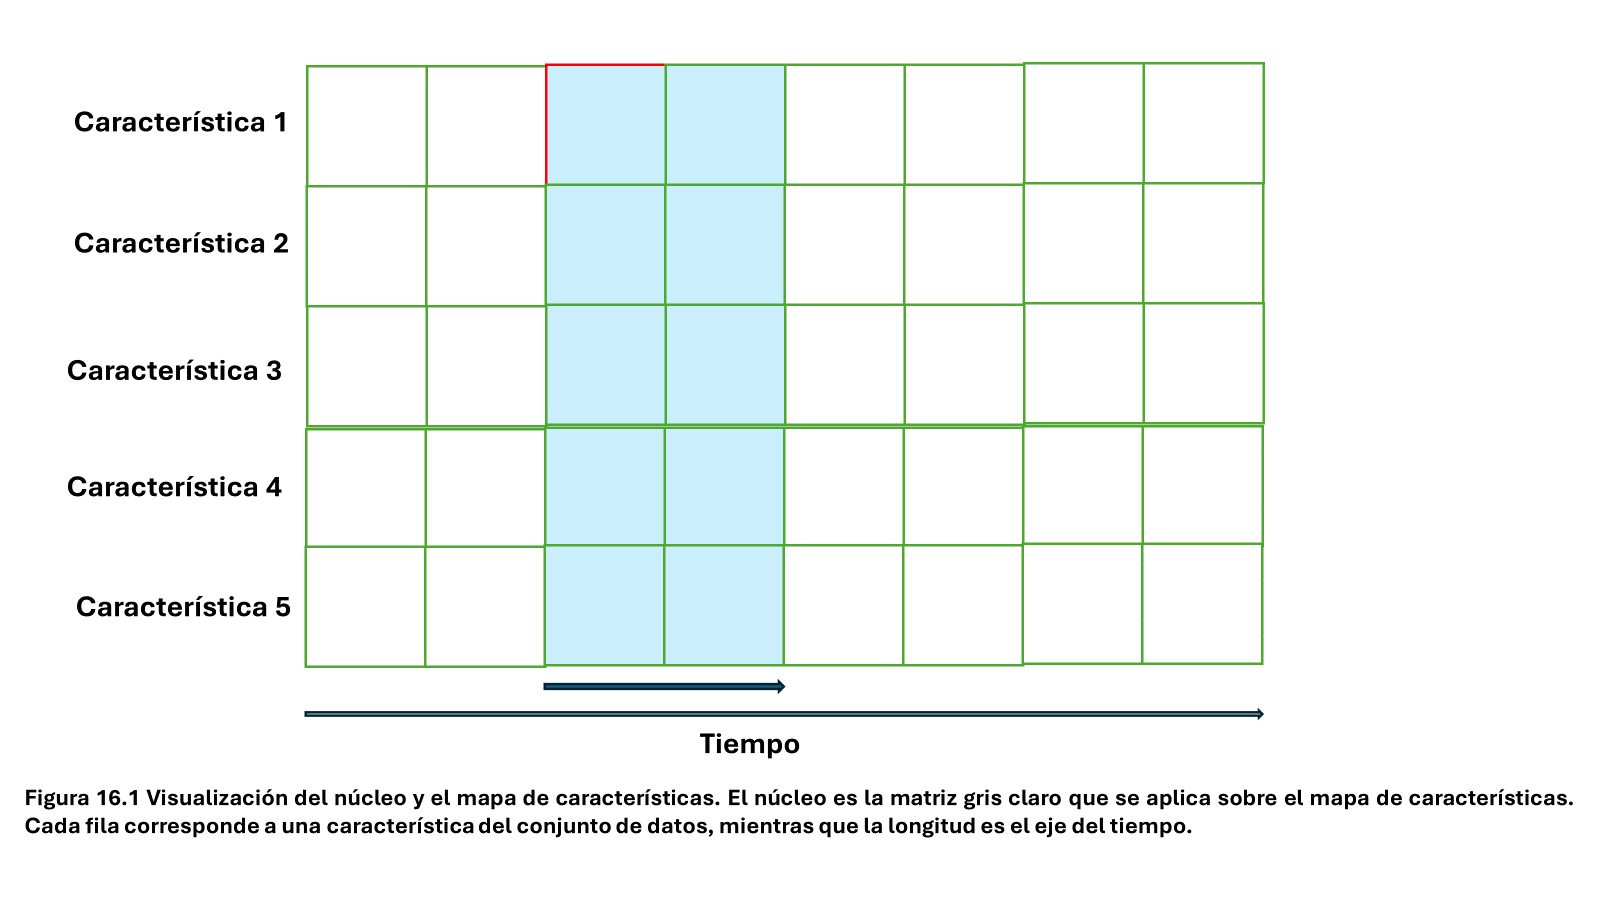


+ Esto da como resultado un conjunto reducido de características, logrando la regularización y el filtrado de valores anormales.
+ Para entender mejor la operación de convolución, consideremos un ejemplo simple con solo una característica y un núcleo, como se muestra en la figura 16.2.

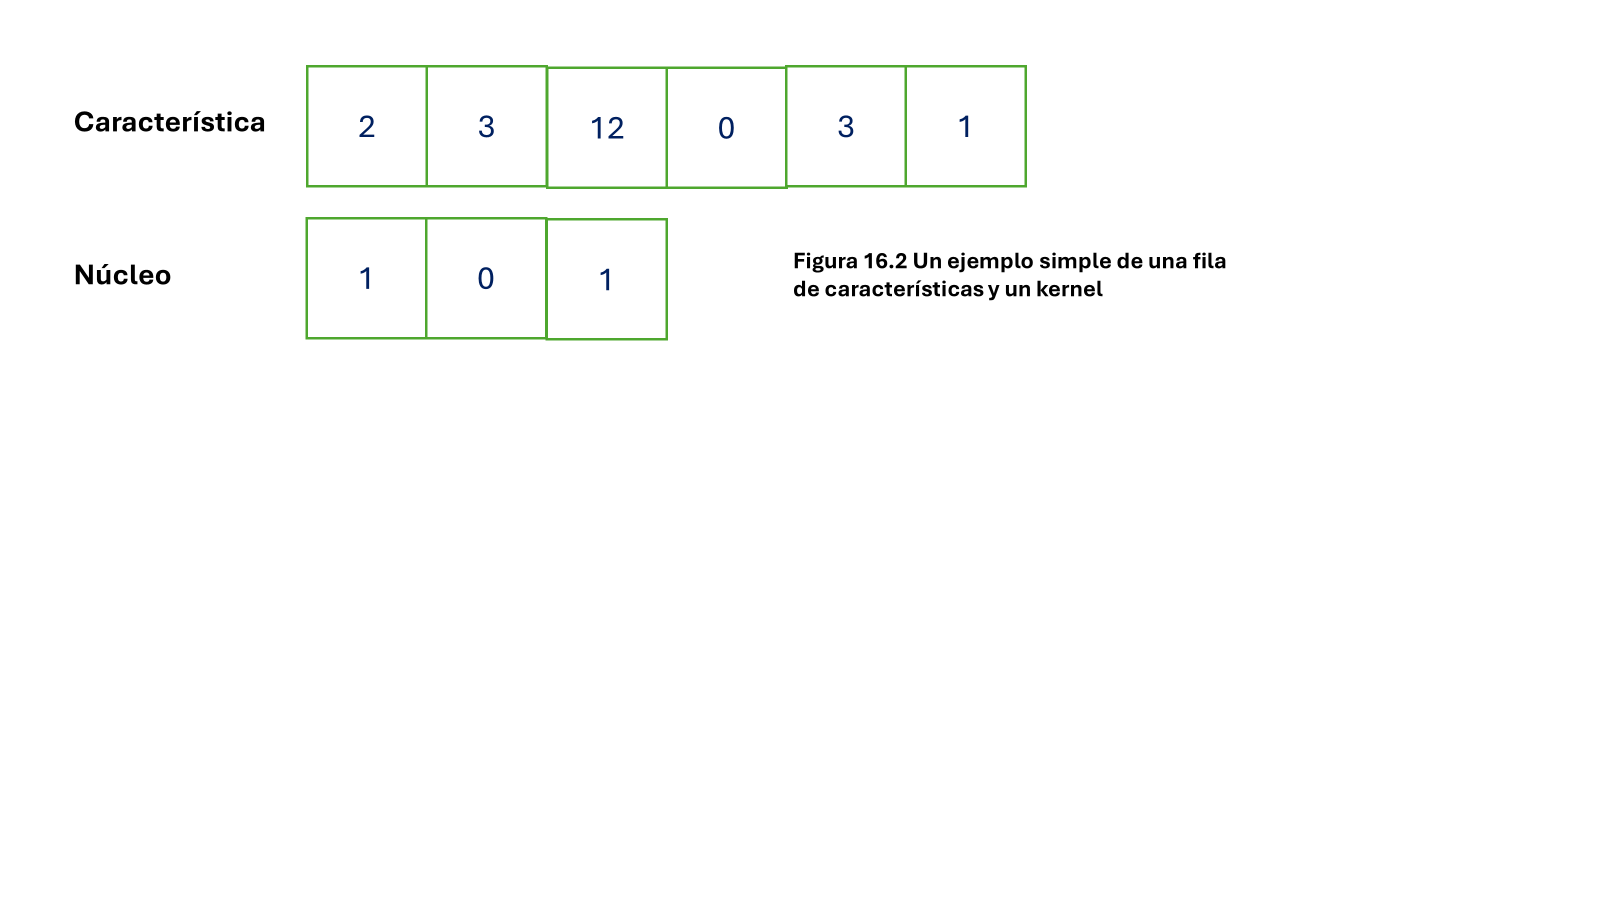


+ Para simplificar las cosas, consideraremos solo una fila de características.
+ Tenga en cuenta que el eje horizontal sigue siendo la dimensión de tiempo.
+ El núcleo es un vector más pequeño que se utiliza para realizar la operación de convolución.
+ No se preocupe por los valores utilizados dentro del núcleo y el vector de características.
+ Son valores arbitrarios.
+ Los valores del núcleo están optimizados y cambiarán a medida que se entrena la red.
+ Podemos visualizar la operación de convolución y su resultado en la figura 16.3.

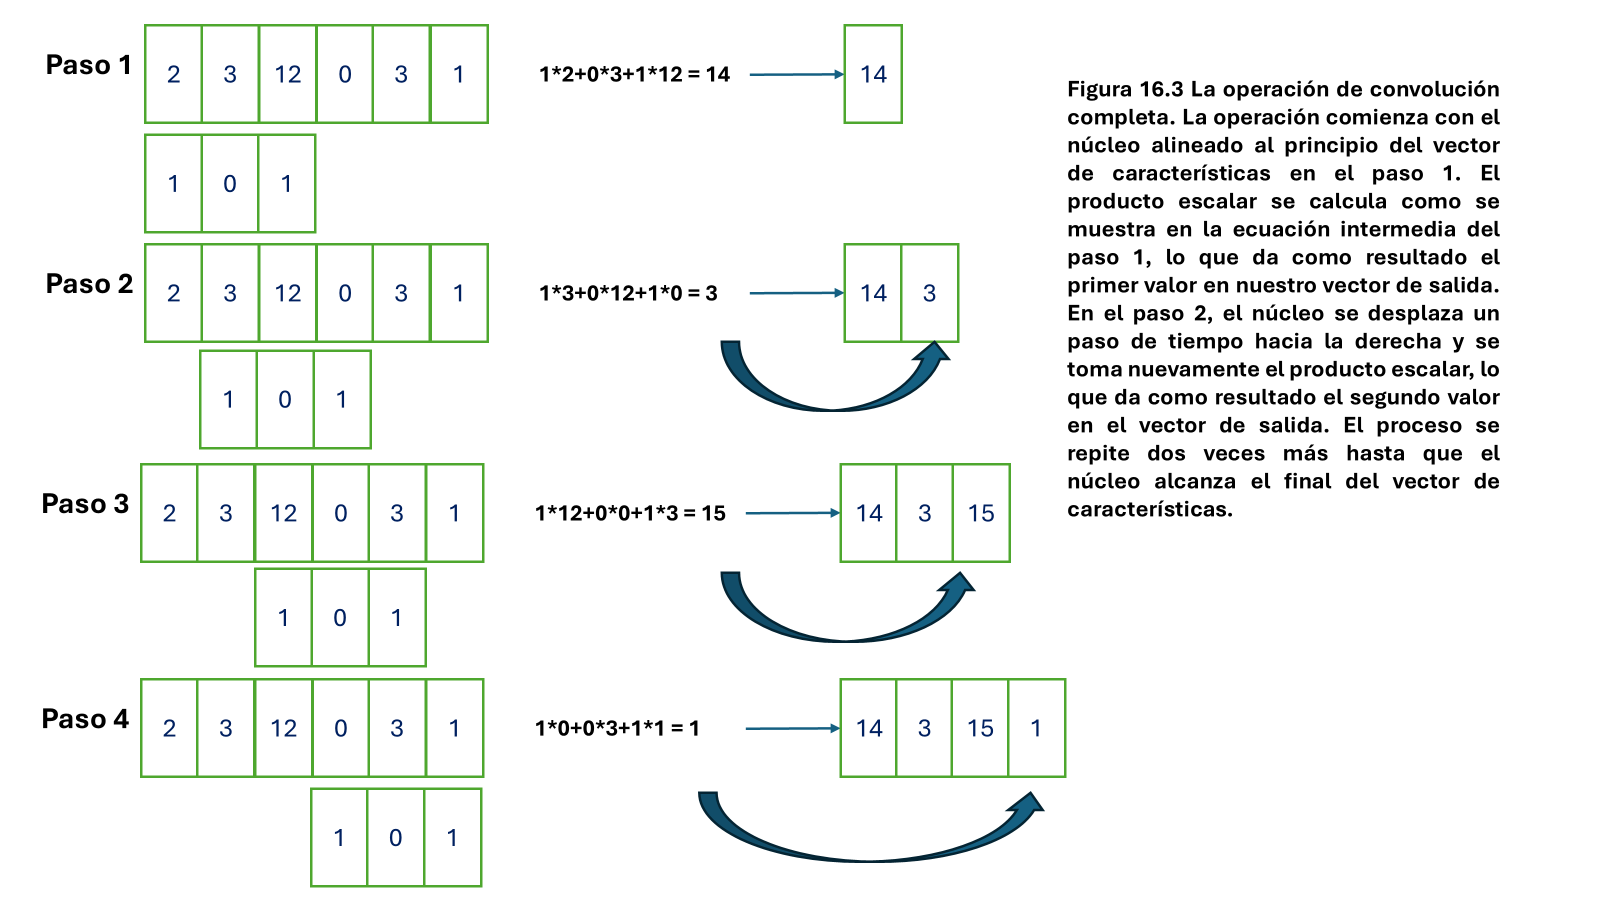


+ Primero, el núcleo se alinea con el comienzo del vector de características y se toma el producto escalar entre el núcleo y los valores del vector de características que están alineados con él.
+ Una vez hecho esto, el núcleo se desplaza un paso de tiempo hacia la derecha; esto también se llama paso de un paso de tiempo.
+ El producto escalar se toma nuevamente entre el núcleo y el vector de características, nuevamente solo con los valores que están alineados con el núcleo.
+ El núcleo se desplaza nuevamente un paso de tiempo hacia la derecha y el proceso se repite hasta que el núcleo alcanza el final del vector de características.
+ Esto sucede cuando el núcleo no se puede desplazar más y todos sus valores tienen un valor de característica alineado.
+ En la figura 16.3 puede ver que, utilizando un vector de características de longitud 6 y un núcleo de longitud 3, obtenemos un vector de salida de longitud 4.
+ Por lo tanto, en general, la longitud del vector de salida de una convolución está dada por la ecuación 16.1.
+ **Ecuación 16.1**
  + **longitud de salida = longitud de entrada – longitud del núcleo + 1**
+ Tenga en cuenta que, dado que el núcleo se mueve solo en una dirección (hacia la derecha), se trata de una convolución unidimensional.
+ Afortunadamente, *Keras* viene con la capa `Conv1D`, lo que nos permite implementarla fácilmente en Python.
+ Esto se utiliza principalmente para la previsión de series temporales, ya que el núcleo solo puede moverse en la dimensión temporal.
+ Para el procesamiento de imágenes, a menudo verá convoluciones bidimensionales o tridimensionales, pero eso está fuera del alcance de este libro.
+ Una capa de convolución reduce la longitud del conjunto de características, y realizar muchas convoluciones seguirá reduciendo el espacio de características.
+ Esto puede ser problemático, ya que limita la cantidad de capas en la red y podríamos perder demasiada información en el proceso.
+ Una técnica común para evitarlo es el relleno.
+ El relleno simplemente significa agregar valores antes y después del vector de características para mantener la longitud de salida equivalente a la longitud de entrada.
+ Los valores de relleno suelen ser ceros. Puede ver esto en acción en la figura 16.4, donde la salida de la convolución tiene la misma longitud que la entrada.

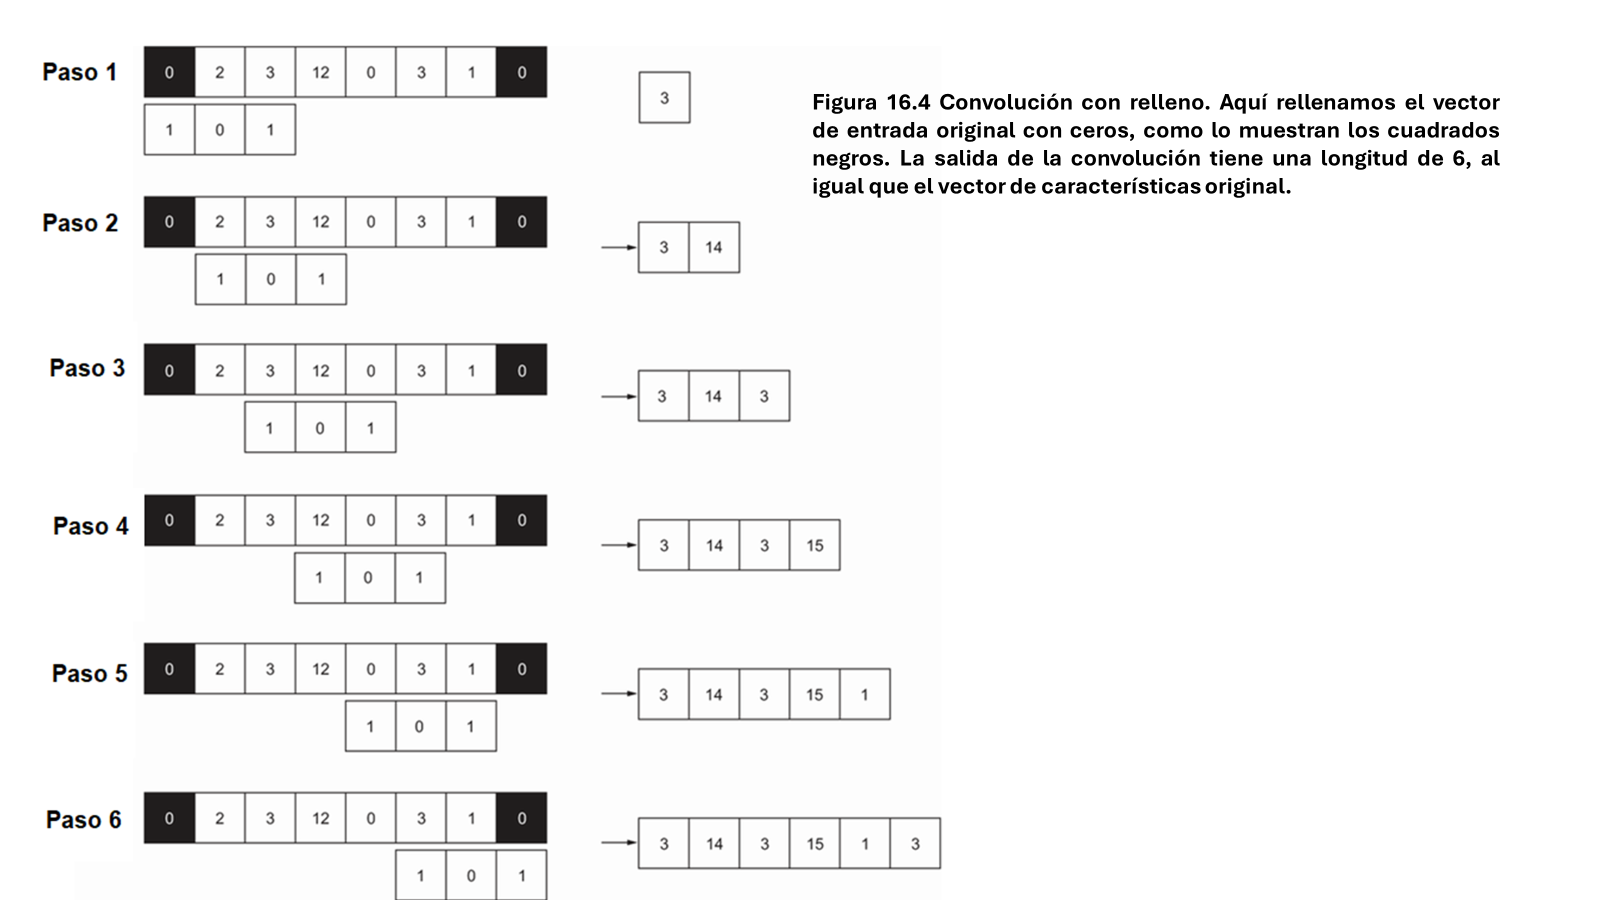

+ De este modo, puede ver cómo el relleno mantiene constante la dimensión de la salida, lo que nos permite apilar más capas de convolución y permitir que la red procese características durante más tiempo.
+ Usamos ceros para el relleno porque se ignora una multiplicación por 0. + Por lo tanto, usar ceros como valores de relleno suele ser una buena opción inicial.
+ Ahora que comprende el funcionamiento interno de una CNN, podemos implementarla con *Keras* y ver si una CNN puede producir predicciones más precisas que los modelos que hemos creado hasta ahora.

### **Red neuronal convolucional (CNN)**
+ *Una red neuronal convolucional (CNN) es una arquitectura de aprendizaje profundo que utiliza la operación de convolución. Esto permite que la red reduzca el espacio de características, filtrando eficazmente las entradas y evitando el sobreajuste.*
+ La convolución se realiza con un núcleo, que también se entrena durante el ajuste del modelo.
+ El paso del núcleo determina la cantidad de pasos que cambia en cada paso de la convolución.
+ En la previsión de series temporales, solo se utiliza la convolución unidimensional.
+ Para evitar reducir el espacio de características demasiado rápido, podemos utilizar el relleno, que agrega ceros antes y después del vector de entrada.
+ Esto mantiene la dimensión de salida igual que el vector de características original, lo que nos permite apilar más capas de convolución, lo que a su vez permite que la red procese las características durante más tiempo.

# **16.2. Implementación de una CNN**
+ Como en los capítulos anteriores, implementaremos la arquitectura de CNN como un modelo de un solo paso, un modelo de varios pasos y un modelo de múltiples salidas.
+ El modelo de un solo paso predecirá el volumen de tráfico solo para el siguiente paso de tiempo, el modelo de varios pasos predecirá el volumen de tráfico para las siguientes 24 horas y el modelo de múltiples salidas predecirá la temperatura y el volumen de tráfico en el siguiente paso de tiempo.
+ En este capítulo, también combinaremos la arquitectura de CNN con la arquitectura LSTM.
+ Puede ser interesante ver si filtrar nuestra serie temporal con una capa de convolución y luego procesar la secuencia filtrada con un LSTM mejorará la precisión de nuestras predicciones.
+ Por lo tanto, implementaremos tanto una CNN únicamente como la combinación de una CNN con un LSTM.
+ Por supuesto, el otro requisito previo es leer el conjunto de entrenamiento, el conjunto de validación y el conjunto de prueba, así que hagámoslo ahora mismo.
+ Por último, utilizaremos una longitud de kernel de tres pasos de tiempo en nuestra implementación de CNN.
+ Este es un valor arbitrario y tendrás la oportunidad de experimentar con varias longitudes de kernel en los ejercicios de este capítulo y ver cómo afectan el rendimiento del modelo.
+ Sin embargo, tu kernel debe tener una longitud mayor que 1; de lo contrario, simplemente estás multiplicando el espacio de características por un escalar y no se logrará ningún filtrado.

## **16.2.1. Implementación de una CNN como un modelo de un solo paso**
+ Comenzaremos implementando una CNN como un modelo de un solo paso.
+ Recuerde que el modelo de un solo paso genera una predicción del volumen de tráfico en el siguiente paso temporal utilizando la última característica
conocida.
+ Sin embargo, en este caso, no tiene sentido proporcionar al modelo CNN solo un paso temporal como entrada porque queremos ejecutar una convolución.
+ En su lugar, utilizaremos tres valores de entrada para generar una predicción para el siguiente paso temporal.
+ De esa manera, tendremos una secuencia de datos en la que podemos ejecutar una operación de convolución.
+ Además, nuestra secuencia de entrada debe tener una longitud al menos igual a la longitud del núcleo, que en nuestro caso es 3.
+ Recuerde que expresamos la relación entre la longitud de entrada, la longitud del núcleo y la longitud de salida en la ecuación 16.1:
+ **longitud_de_salida = longitud_de_entrada – longitud_del_núcleo + 1**
+ *En esta ecuación, ninguna longitud puede ser igual a 0, ya que eso significaría que no se están procesando ni generando datos*.
+ La condición de que ninguna longitud puede ser 0 solo se cumple si
la longitud de entrada es mayor o igual que la longitud del núcleo.
+ Por lo tanto, nuestra secuencia de entrada debe tener al menos tres pasos de tiempo.
+ De esta manera, podemos definir la ventana de datos que se utilizará para entrenar el modelo.

+ Para fines de representación gráfica, nos gustaría ver las predicciones del modelo durante un período de 24 horas.
+ De esa manera, podemos evaluar los pronósticos continuos del modelo paso de tiempo a la vez, durante 24 pasos de tiempo.
+ Por lo tanto, necesitamos definir otra ventana de datos con un ancho de etiqueta de 24.
+ El cambio sigue siendo 1, ya que el modelo solo predice el siguiente paso de tiempo.
+ La longitud de entrada se obtiene reorganizando la ecuación 16.1 como ecuación 16.2.
+ **longitud de salida = longitud de entrada – longitud del núcleo + 1**
+ Ecuación 16.2 **longitud de entrada = longitud de salida + longitud del núcleo – 1**
+ Ahora podemos calcular simplemente la longitud de entrada requerida para generar predicciones sobre una secuencia de 24 pasos de tiempo.
+ En este caso, la longitud de entrada es $24 + 3 – 1 = 26$.
+ De esa manera, evitamos usar relleno. Más adelante, en los ejercicios, podrá intentar usar relleno en lugar de una secuencia de entrada más larga para acomodar la longitud de salida.
+ Ahora podemos definir nuestra ventana de datos para trazar las predicciones del modelo.
+ Con todas las ventanas de datos listas, podemos definir nuestro modelo CNN.
+ Nuevamente, usaremos el modelo Secuencial de Keras para apilar diferentes capas.
+ Luego usaremos la capa Conv1D, ya que estamos trabajando con series temporales y el núcleo solo se mueve en la dimensión temporal.
+ El parámetro de filtros es equivalente al parámetro de unidades de la capa
Densa, y simplemente representa la cantidad de neuronas en la capa convolucional.
+ Estableceremos `kernel_size` en el ancho de nuestro kernel, que es 3.
+ No necesitamos especificar las otras dimensiones, ya que Keras tomará automáticamente la forma correcta para acomodar las entradas.
+ Luego, pasaremos la salida de la CNN a una capa densa.
+ De esa manera, el modelo aprenderá sobre un conjunto reducido de características que fueron filtradas previamente por el paso
convolucional.
+ Finalmente, generaremos una predicción con una capa densa de solo una unidad, ya que estamos pronosticando solo el volumen de tráfico para el siguiente paso de tiempo.

# **Paso 1. Las librerias de necesarias**
+ El primer paso natural es importar las bibliotecas que serán necesarias para completar el proyecto.
+ Luego podemos cargar los datos y almacenarlos en un DataFrame para usarlos durante todo el proyecto.
+ Por lo tanto, importaremos las siguientes bibliotecas y especificaremos la función mágica %matplotlib inline para mostrar los gráficos en el cuaderno:

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell


In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

# **Paso 2. Importando los datos**
+ Una vez importadas las bibliotecas, podemos leer los datos y almacenarlos en un DataFrame.
+ Como se mencionó, este conjunto de datos es una versión abreviada y depurada del conjunto de datos original disponible en el repositorio de aprendizaje automático de UCI.
+ En este caso, el conjunto de datos comienza el 29 de septiembre de 2016 a las 5 p. m. y finaliza el 30 de septiembre de 2018 a las 11 p. m.
+ Si utilizamos df.shape, podemos ver que tenemos un total de seis características y 17551 filas.
+ Las características incluyen la fecha y la hora, la temperatura, la cantidad de lluvia y nieve, la cobertura de nubes y el volumen de tráfico. La Tabla 12.1 describe cada columna con más detalle.

+ **Tabla 12.1 Variables en el conjunto de datos de volumen de tráfico interestatal metropolitano**


|Característica |Descripción|
|:--|:--:|
|date_time| Fecha y hora de los datos, registrados en la zona horaria CST. El formato es AAAA-MM-DD HH:MM:SS.
|temp |Temperatura promedio registrada en la hora, expresada en Kelvin.
|rain_1h| Cantidad de lluvia que cayó en la hora, expresada en milímetros.
|snow_1h| Cantidad de nieve que cayó en la hora, expresada en milímetros.
|clouds_all| Porcentaje de nubosidad durante la hora.
|Traffic_volume| Volumen de tráfico informado en dirección oeste por la I-94 durante la hora.

In [ ]:
## **Paso 2. Importando los datos**

train_df = pd.read_csv('/content/train.csv', index_col=0)
val_df = pd.read_csv('/content/val.csv', index_col=0)
test_df = pd.read_csv('/content/test.csv', index_col=0)

print(train_df.shape, val_df.shape, test_df.shape)

(12285, 5) (3510, 5) (1756, 5)


### **Paso 3. Implementando la clase DataWindow**


In [ ]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

### **Clase DataWindow creada**

+ Por ahora, la clase DataWindow puede parecer un poco abstracta, pero pronto la usaremos para aplicar modelos de referencia.
+ Usaremos esta clase en todos los capítulos de esta parte del libro dedicada al aprendizaje profundo, por lo que poco a poco dominarás este código y apreciarás lo fácil que es probar diferentes arquitecturas de aprendizaje profundo.

In [ ]:
def compile_and_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')

    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])

    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])

    return history

In [ ]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}

CNN
Single-step model

In [ ]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1

conv_window = DataWindow(input_width=KERNEL_WIDTH, label_width=1, shift=1, label_columns=['traffic_volume'])
wide_conv_window = DataWindow(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=1, label_columns=['traffic_volume'])

In [ ]:
# Values obtained from chapter 15

mae_val = [0.083, 0.068, 0.033, 0.03]
mae_test = [0.081, 0.068, 0.029, 0.026]

In [ ]:
cnn_model = Sequential([
    Conv1D(filters=32,
          kernel_size=(KERNEL_WIDTH,),
          activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

history = compile_and_fit(cnn_model, conv_window)

val_performance = {}
performance = {}

val_performance['CNN'] = cnn_model.evaluate(conv_window.val)
performance['CNN'] = cnn_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
384/384 [==============================] - 3s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0920 - val_loss: 0.0060 - val_mean_absolute_error: 0.0581
Epoch 2/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0549 - val_loss: 0.0039 - val_mean_absolute_error: 0.0478
Epoch 3/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0462 - val_loss: 0.0032 - val_mean_absolute_error: 0.0420
Epoch 4/50
384/384 [==============================] - 3s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0422 - val_loss: 0.0029 - val_mean_absolute_error: 0.0396
Epoch 5/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0403 - val_loss: 0.0026 - val_mean_absolute_error: 0.0375
Epoch 6/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0395 - val_loss: 0.0024 - val_mean_absolute_error: 0.0365
Epoch 7/50
384/3

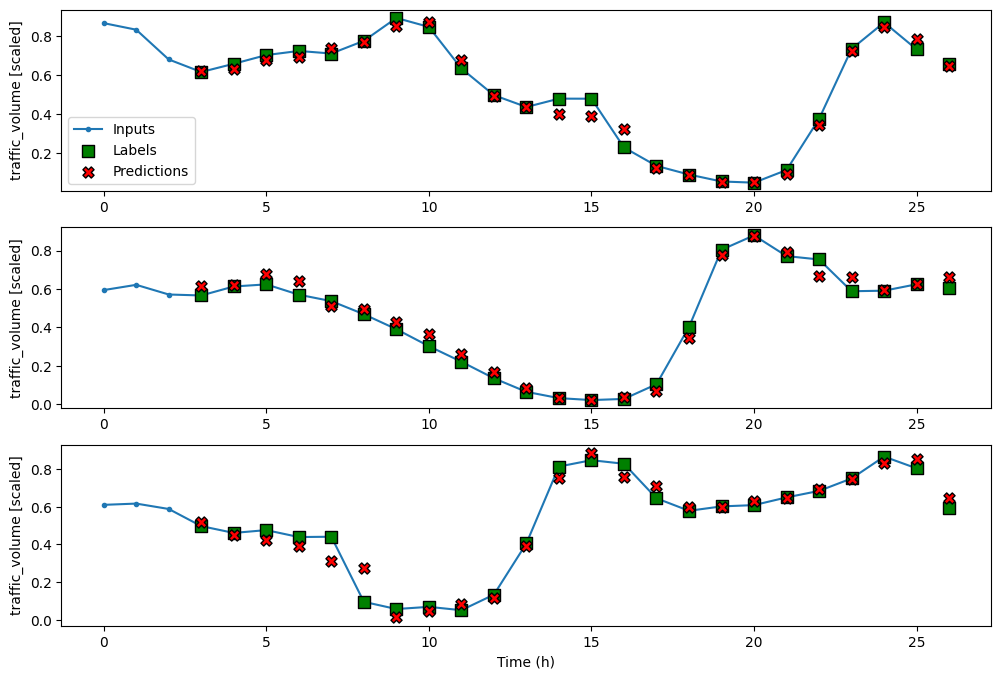

In [ ]:
wide_conv_window.plot(cnn_model)

plt.savefig('figures', dpi=300)

CNN + LSTM

In [ ]:
cnn_lstm_model = Sequential([
    Conv1D(filters=32,
          kernel_size=(KERNEL_WIDTH,),
          activation='relu'),
    LSTM(32, return_sequences=True),
    LSTM(32, return_sequences=True),
    Dense(1)
])

history = compile_and_fit(cnn_lstm_model, conv_window)

val_performance['CNN + LSTM'] = cnn_lstm_model.evaluate(conv_window.val)
performance['CNN + LSTM'] = cnn_lstm_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
384/384 [==============================] - 9s 9ms/step - loss: 0.0328 - mean_absolute_error: 0.1209 - val_loss: 0.0074 - val_mean_absolute_error: 0.0619
Epoch 2/50
384/384 [==============================] - 3s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0578 - val_loss: 0.0052 - val_mean_absolute_error: 0.0528
Epoch 3/50
384/384 [==============================] - 4s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0509 - val_loss: 0.0043 - val_mean_absolute_error: 0.0481
Epoch 4/50
384/384 [==============================] - 3s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0483 - val_loss: 0.0036 - val_mean_absolute_error: 0.0447
Epoch 5/50
384/384 [==============================] - 3s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0454 - val_loss: 0.0033 - val_mean_absolute_error: 0.0428
Epoch 6/50
384/384 [==============================] - 4s 10ms/step - loss: 0.0035 - mean_absolute_error: 0.0429 - val_loss: 0.0035 - val_mean_absolute_error: 0.0453
Epoch 7/50
384

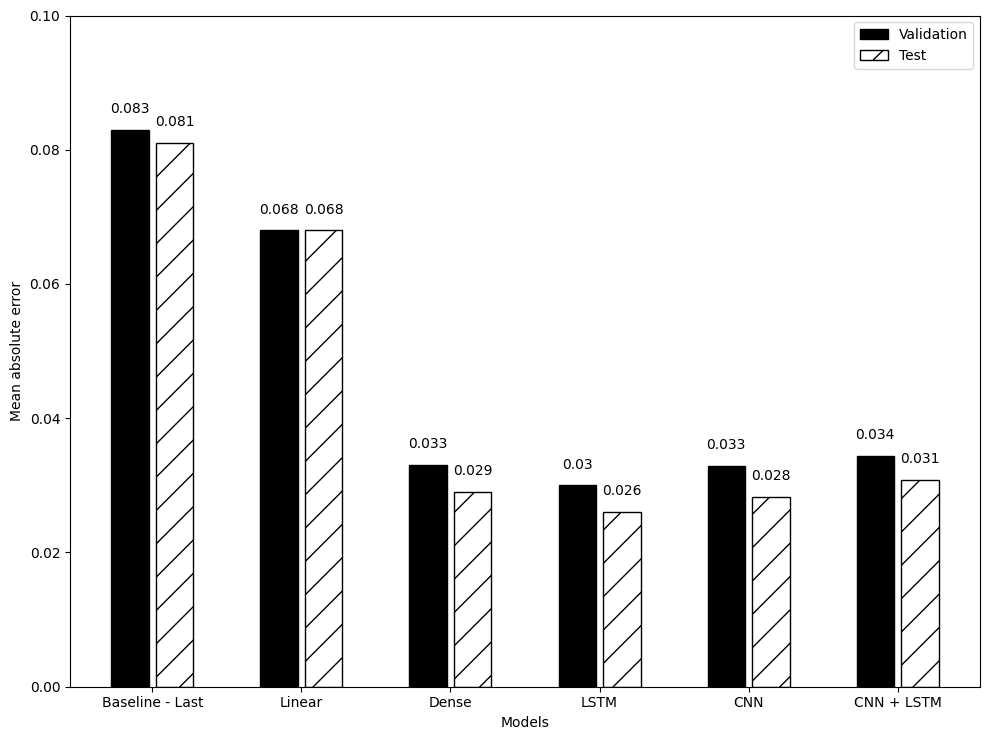

In [ ]:
mae_val.extend([v[1] for v in val_performance.values()])
mae_test.extend([v[1] for v in performance.values()])

x = np.arange(6)

labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM', 'CNN', 'CNN + LSTM']

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures', dpi=300)


Multi-step model

In [ ]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1

multi_window = DataWindow(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=24, label_columns=['traffic_volume'])

In [ ]:
# Values obtained from chapter 15

ms_mae_val = [0.352, 0.347, 0.088, 0.078, 0.070]
ms_mae_test = [0.347, 0.341, 0.076, 0.064, 0.058]

In [ ]:
ms_cnn_model = Sequential([
    Conv1D(32, activation='relu', kernel_size=(KERNEL_WIDTH)),
    Dense(units=32, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_cnn_model, multi_window)

ms_val_performance = {}
ms_performance = {}

ms_val_performance['CNN'] = ms_cnn_model.evaluate(multi_window.val)
ms_performance['CNN'] = ms_cnn_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
383/383 [==============================] - 4s 7ms/step - loss: 0.0342 - mean_absolute_error: 0.1221 - val_loss: 0.0168 - val_mean_absolute_error: 0.0842
Epoch 2/50
383/383 [==============================] - 2s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0790 - val_loss: 0.0161 - val_mean_absolute_error: 0.0834
Epoch 3/50
383/383 [==============================] - 2s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0785 - val_loss: 0.0162 - val_mean_absolute_error: 0.0873
Epoch 4/50
383/383 [==============================] - 4s 10ms/step - loss: 0.0137 - mean_absolute_error: 0.0780 - val_loss: 0.0154 - val_mean_absolute_error: 0.0820
Epoch 5/50
383/383 [==============================] - 2s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0778 - val_loss: 0.0152 - val_mean_absolute_error: 0.0807
Epoch 6/50
383/383 [==============================] - 2s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0773 - val_loss: 0.0151 - val_mean_absolute_error: 0.0827
Epoch 7/50
383/

CNN + LSTM

In [ ]:
ms_cnn_lstm_model = Sequential([
    Conv1D(32, activation='relu', kernel_size=(KERNEL_WIDTH)),
    LSTM(32, return_sequences=True),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_cnn_lstm_model, multi_window)

ms_val_performance['CNN + LSTM'] = ms_cnn_lstm_model.evaluate(multi_window.val)
ms_performance['CNN + LSTM'] = ms_cnn_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
383/383 [==============================] - 10s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.1396 - val_loss: 0.0171 - val_mean_absolute_error: 0.0895
Epoch 2/50
383/383 [==============================] - 6s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0815 - val_loss: 0.0161 - val_mean_absolute_error: 0.0836
Epoch 3/50
383/383 [==============================] - 8s 22ms/step - loss: 0.0139 - mean_absolute_error: 0.0784 - val_loss: 0.0154 - val_mean_absolute_error: 0.0804
Epoch 4/50
383/383 [==============================] - 7s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0764 - val_loss: 0.0151 - val_mean_absolute_error: 0.0803
Epoch 5/50
383/383 [==============================] - 9s 23ms/step - loss: 0.0130 - mean_absolute_error: 0.0750 - val_loss: 0.0151 - val_mean_absolute_error: 0.0780
Epoch 6/50
383/383 [==============================] - 8s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0741 - val_loss: 0.0143 - val_mean_absolute_error: 0.0771
Epoch 7/5

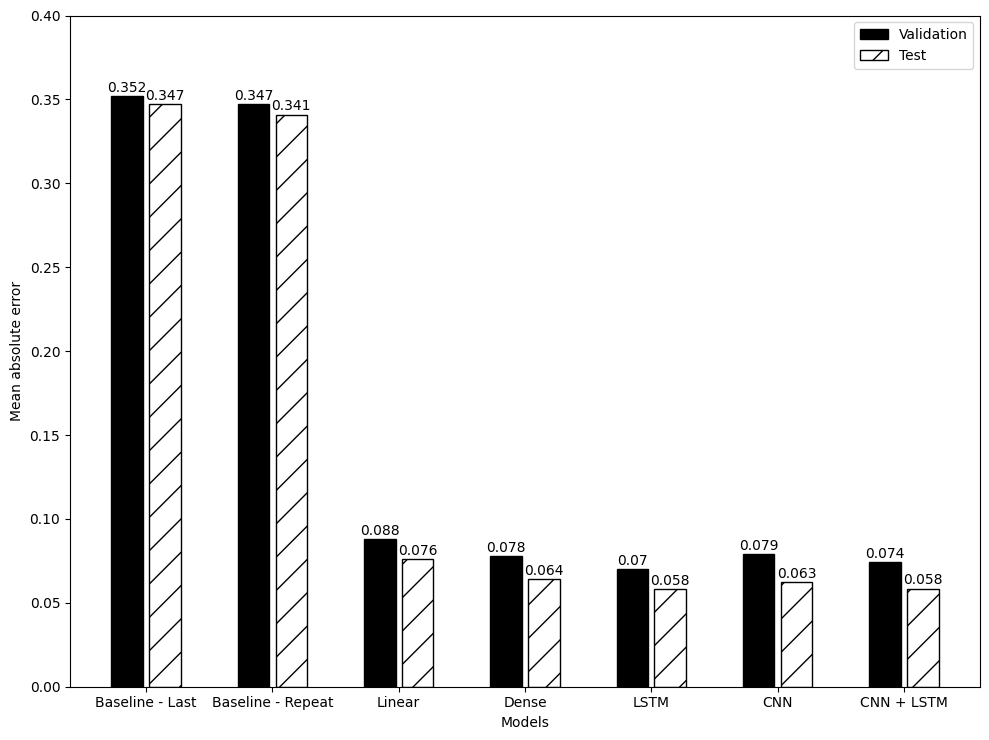

In [ ]:
ms_mae_val.extend([v[1] for v in ms_val_performance.values()])
ms_mae_test.extend([v[1] for v in ms_performance.values()])

x = np.arange(7)

labels = ['Baseline - Last', 'Baseline - Repeat', 'Linear', 'Dense', 'LSTM', 'CNN', 'CNN + LSTM']

fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures', dpi=300)


Multi-output model

In [ ]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1

wide_mo_conv_window = DataWindow(input_width=INPUT_WIDTH, label_width=24, shift=1, label_columns=['temp', 'traffic_volume'])

In [ ]:
# Values from chapter 15

mo_mae_val = [0.048, 0.039, 0.023, 0.020]
mo_mae_test = [0.047, 0.036, 0.020, 0.017]

In [ ]:
mo_cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_WIDTH,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2)
])

history = compile_and_fit(mo_cnn_model, wide_mo_conv_window)

mo_val_performance = {}
mo_performance = {}

mo_val_performance['CNN'] = mo_cnn_model.evaluate(wide_mo_conv_window.val)
mo_performance['CNN'] = mo_cnn_model.evaluate(wide_mo_conv_window.test, verbose=0)

Epoch 1/50
384/384 [==============================] - 3s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0639 - val_loss: 0.0025 - val_mean_absolute_error: 0.0335
Epoch 2/50
384/384 [==============================] - 3s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0323 - val_loss: 0.0018 - val_mean_absolute_error: 0.0285
Epoch 3/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0020 - mean_absolute_error: 0.0286 - val_loss: 0.0016 - val_mean_absolute_error: 0.0274
Epoch 4/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0267 - val_loss: 0.0014 - val_mean_absolute_error: 0.0256
Epoch 5/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0257 - val_loss: 0.0013 - val_mean_absolute_error: 0.0241
Epoch 6/50
384/384 [==============================] - 3s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0249 - val_loss: 0.0013 - val_mean_absolute_error: 0.0236
Epoch 7/50
384/3

In [ ]:
mo_cnn_lstm_model = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_WIDTH,), activation='relu'),
    LSTM(32, return_sequences=True),
    Dense(units=2)
])

history = compile_and_fit(mo_cnn_lstm_model, wide_mo_conv_window)

mo_val_performance['CNN + LSTM'] = mo_cnn_model.evaluate(wide_mo_conv_window.val)
mo_performance['CNN + LSTM'] = mo_cnn_model.evaluate(wide_mo_conv_window.test, verbose=0)

Epoch 1/50
384/384 [==============================] - 10s 21ms/step - loss: 0.0167 - mean_absolute_error: 0.0793 - val_loss: 0.0036 - val_mean_absolute_error: 0.0392
Epoch 2/50
384/384 [==============================] - 6s 16ms/step - loss: 0.0030 - mean_absolute_error: 0.0354 - val_loss: 0.0022 - val_mean_absolute_error: 0.0310
Epoch 3/50
384/384 [==============================] - 6s 16ms/step - loss: 0.0023 - mean_absolute_error: 0.0302 - val_loss: 0.0016 - val_mean_absolute_error: 0.0268
Epoch 4/50
384/384 [==============================] - 7s 19ms/step - loss: 0.0019 - mean_absolute_error: 0.0273 - val_loss: 0.0015 - val_mean_absolute_error: 0.0254
Epoch 5/50
384/384 [==============================] - 6s 16ms/step - loss: 0.0017 - mean_absolute_error: 0.0260 - val_loss: 0.0014 - val_mean_absolute_error: 0.0245
Epoch 6/50
384/384 [==============================] - 7s 18ms/step - loss: 0.0017 - mean_absolute_error: 0.0254 - val_loss: 0.0014 - val_mean_absolute_error: 0.0262
Epoch 7/5

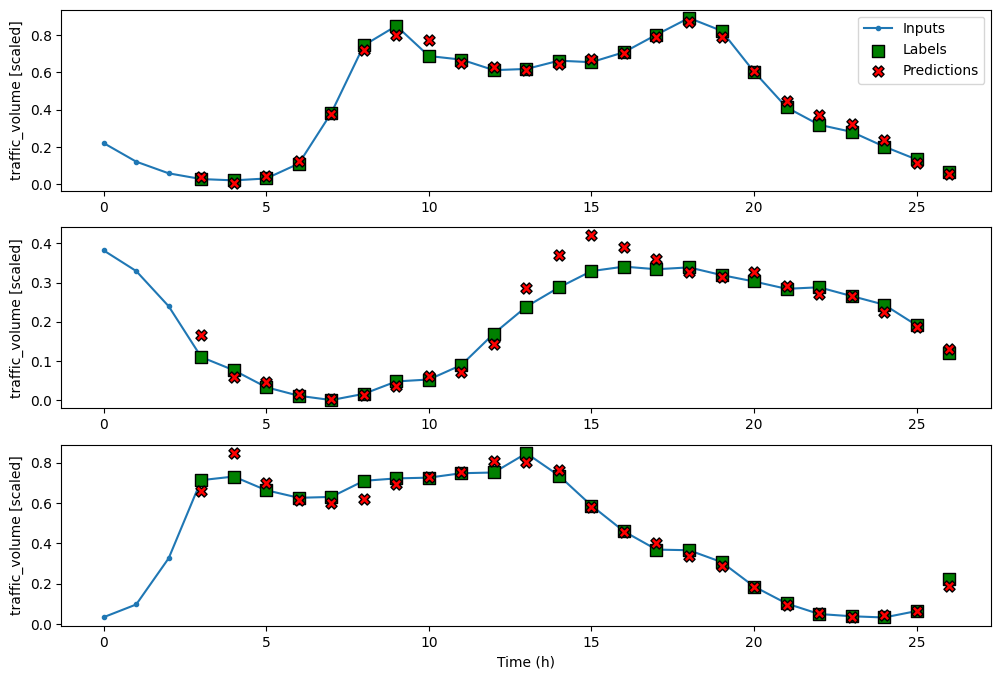

In [ ]:
wide_mo_conv_window.plot(mo_cnn_lstm_model)

109/109 [==============================] - 1s 9ms/step - loss: 0.0013 - mean_absolute_error: 0.0232


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (7,).

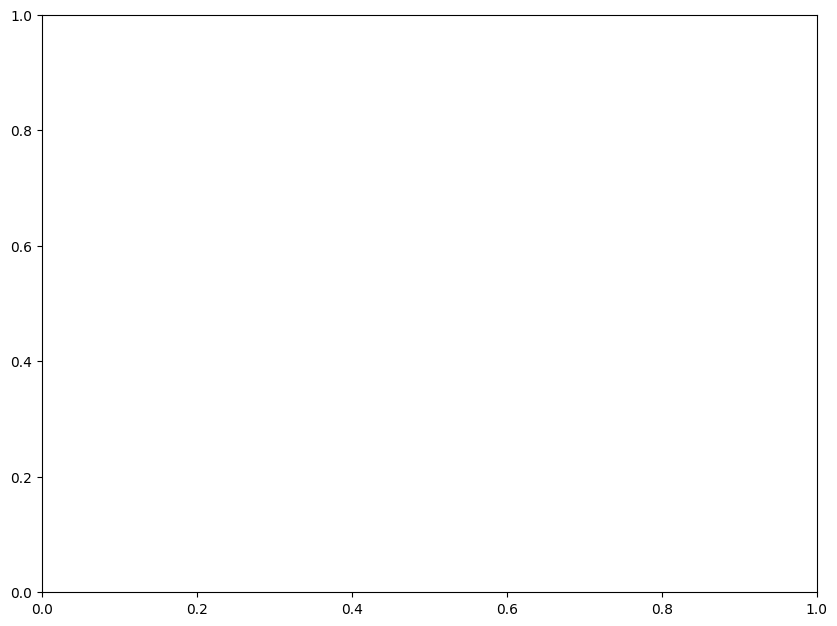

In [ ]:
mo_mae_val = [0.048, 0.039, 0.023, 0.020]
mo_mae_test = [0.047, 0.036, 0.020, 0.017]

mo_val_performance['CNN + LSTM'] = mo_cnn_model.evaluate(wide_mo_conv_window.val)
mo_performance['CNN + LSTM'] = mo_cnn_model.evaluate(wide_mo_conv_window.test, verbose=0)

# Use mo_cnn_lstm_model instead of mo_cnn_model to evaluate
mo_mae_val.extend([v[1] for v in mo_val_performance.values()])
mo_mae_test.extend([v[1] for v in mo_performance.values()])

x = np.arange(6)

labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM', 'CNN', 'CNN + LSTM']

fig, ax = plt.subplots()
ax.bar(x-0.15, mo_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x+0.15, mo_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mo_mae_val):
    plt.text(x=index - 0.15, y=value+0.001, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mo_mae_test):
    plt.text(x=index + 0.15, y=value+0.001, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.06)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures', dpi=300)

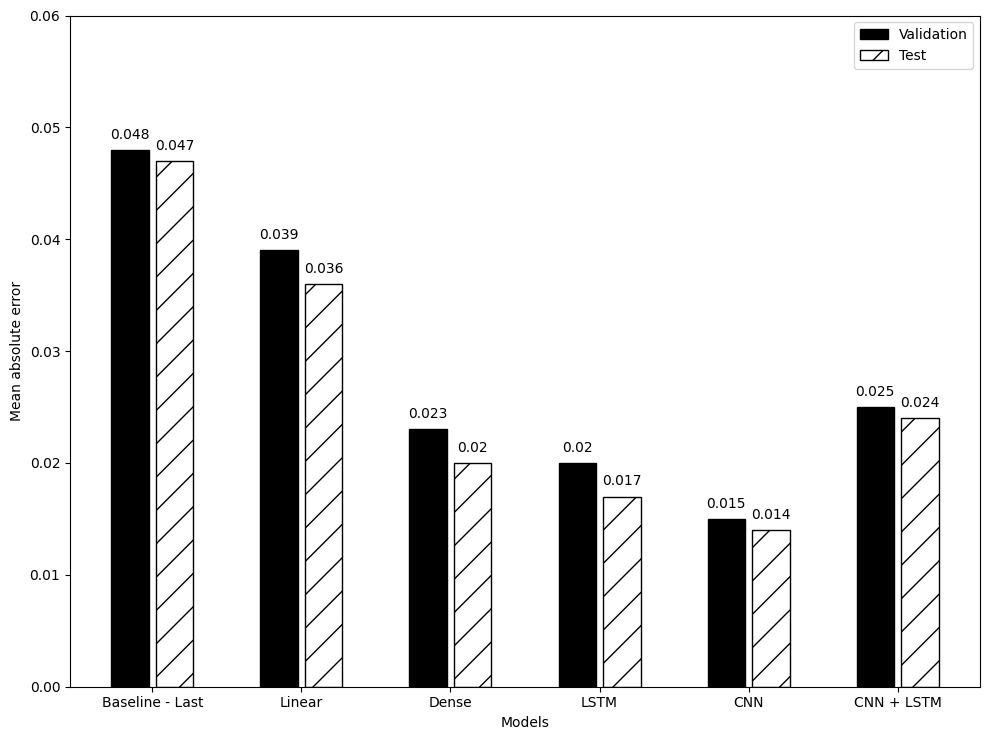

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
mo_mae_val = [0.048, 0.039, 0.023, 0.020]
mo_mae_test = [0.047, 0.036, 0.020, 0.017]

# Simulación de mo_val_performance y mo_performance
mo_val_performance = {'model1': [0.1, 0.015], 'model2': [0.2, 0.025]}
mo_performance = {'model1': [0.1, 0.014], 'model2': [0.2, 0.024]}

# Extendiendo las listas con los valores de mo_val_performance y mo_performance
mo_mae_val.extend([v[1] for v in mo_val_performance.values()])
mo_mae_test.extend([v[1] for v in mo_performance.values()])

# Asegúrate de que los datos extendidos tengan la longitud correcta
x = np.arange(len(mo_mae_val))

labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM', 'CNN', 'CNN + LSTM']

fig, ax = plt.subplots()

# Graficar las barras
ax.bar(x - 0.15, mo_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mo_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')

# Etiquetas de los ejes
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

# Añadir valores de texto en las barras
for index, value in enumerate(mo_mae_val):
    plt.text(x=index - 0.15, y=value + 0.001, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mo_mae_test):
    plt.text(x=index + 0.15, y=value + 0.001, s=str(round(value, 3)), ha='center')

# Configuración de los ejes y leyenda
plt.ylim(0, 0.06)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

# Guardar la figura
plt.savefig('figures', dpi=300)
plt.show()


In [ ]:
# ipython-input-30-43a9fd5f61ff
mo_cnn_lstm_model = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_WIDTH,), activation='relu'),
    LSTM(32, return_sequences=True),
    Dense(units=2)
])

history = compile_and_fit(mo_cnn_lstm_model, wide_mo_conv_window)

# Use mo_cnn_lstm_model instead of mo_cnn_model to evaluate
mo_val_performance['CNN + LSTM'] = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.val)
mo_performance['CNN + LSTM'] = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.test, verbose=0)

# **14.3. Próximos pasos**
+ En este capítulo, examinamos la arquitectura de la memoria a corto plazo (LSTM).
+ Aprendiste que es un subtipo de RNN y viste cómo utiliza un estado de celda para superar el problema de la memoria a corto plazo que ocurre en una RNN básica que utiliza solo el estado oculto.
+ También estudiamos las tres puertas de la LSTM.
+ La puerta de olvido determina qué información del pasado y del presente debe conservarse, la puerta de entrada determina la información relevante del elemento actual de una secuencia y la puerta de salida utiliza la información almacenada en la memoria para generar una predicción.
+ Luego implementamos la LSTM como un modelo de un solo paso, un modelo de varios pasos y un modelo de múltiples salidas.
+ En todos los casos, la LSTM fue el modelo ganador, ya que logró el MAE más bajo de todos los modelos construidos hasta ahora.

# **Resumen**
+ Una red neuronal recurrente (RNN) es una arquitectura de aprendizaje profundo especialmente adaptada al procesamiento de secuencias de datos como una serie temporal.
+ Las RNN utilizan un estado oculto para almacenar información en la memoria.
+ Sin embargo, esta es solo una memoria de corto plazo debido al problema del gradiente de desaparición.
+ La memoria de corto plazo larga (LSTM) es un tipo de RNN que aborda el problema de la memoria de corto plazo.
+ Utiliza un estado de celda para almacenar información durante un tiempo más largo, lo que le da a la red una memoria larga.
+ La LSTM está formada por tres puertas:
  + La puerta de olvido determina qué información del pasado y del presente debe conservarse.
  + La puerta de entrada determina qué información del presente debe conservarse.
  + La puerta de salida utiliza la información almacenada en la memoria para procesar el elemento actual de una secuencia